# EDA on Haberman's Survival Dataset

## 1. Description

The dataset contains survival status of patients who had undergone surgery for breast cancer. It contains cases from a study which was conducted at the University of Chicago's Billings Hospital between 1958 and 1970. The study was done to find out how many patients survive after the detection of breast cancer and  getting operated for the same for more than 5 yrs. First the number of *axillary nodes* was detected and then the surgery was done. Later they were monitered whether they survive for more than 5 years or not.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


gen = pd.read_csv("haberman.csv")

In [2]:
print(gen.shape)

(306, 4)


In [3]:
print(gen.columns)

Index(['age', 'year', 'numpan', 'survivalstatus'], dtype='object')


In [4]:
gen["survivalstatus"].value_counts()

1    225
2     81
Name: survivalstatus, dtype: int64

## 2. Data Overview

1. The dataset comprises of 306 data points and 4 features.
2. The four features are namely : 
        * Age of Patient at the time of Surgery
        * Year in which Surgery was done
        * Number of Positive Axillary Nodes detected
        * Survival Status
            1 signifies Patients survive for more than 5yrs
            2 signifies Patients survive for less than 5yrs
2. The dataset is clearly an imbalanced dataset with 73.5% of data comprising for survival status more than 5 years and 26.5% of data for survival status less than 5years.

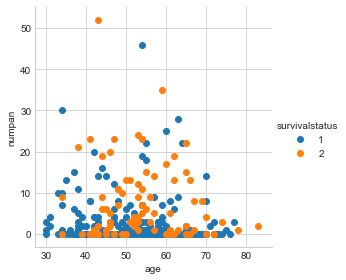

In [5]:
sns.set_style("whitegrid");
sns.FacetGrid(gen, hue="survivalstatus", size=4) \
   .map(plt.scatter, "age", "numpan") \
   .add_legend();
plt.show();

### Conclusion:
1. we can say from above graph that if Number of positive axillary nodes detected is less than 5 and is detected at an early age(around 30 years) then he will survive for more than 5 years

In [6]:
gen['survivalstatus'] = gen['survivalstatus'].apply(lambda x: 'MoreThanOr5' if x == 1 else 'LessThan5')

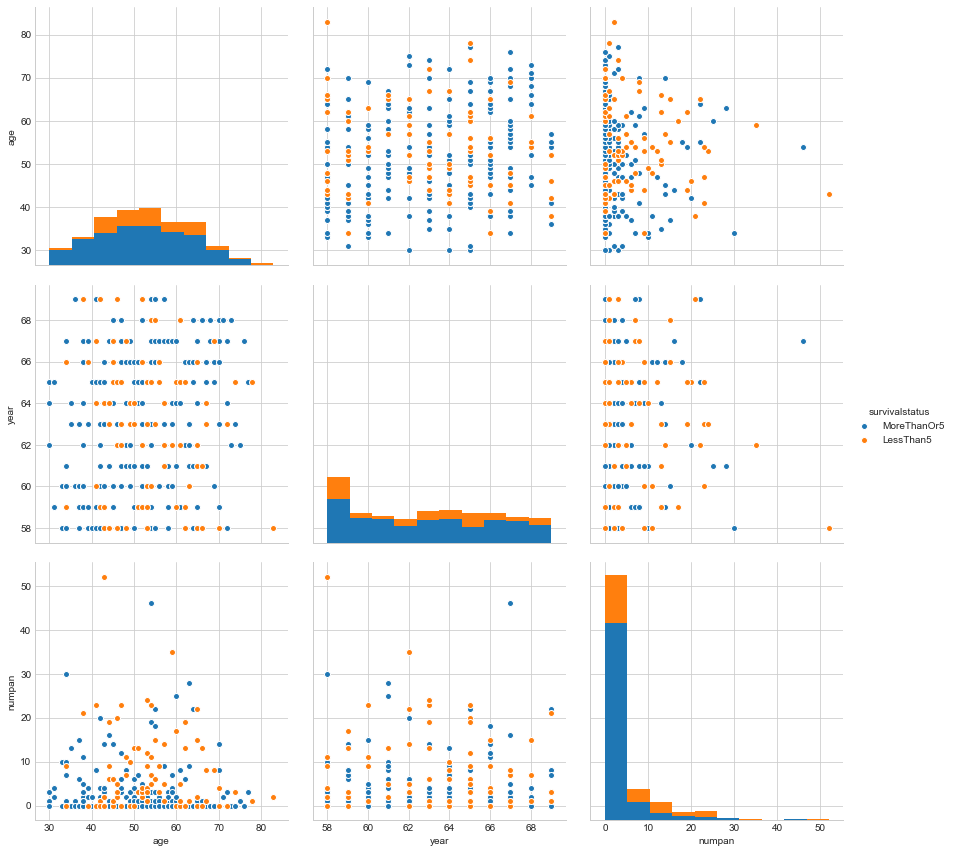

In [7]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(gen, hue="survivalstatus", size=4);
plt.show()

### Conclusion:
1. Again in pair plot graph, if we look at the graph of age vs Number of positive axillary nodes detected, we can say that if Number of positive axillary nodes detected is less than 5 and is detected at an early age, around 30(30,31,32,33), then he will survive for more than 5 years
2. from age vs year graph, we can say that if the age of person was around 30, then he survived for more than 5 years , no matter in which year he was operated.

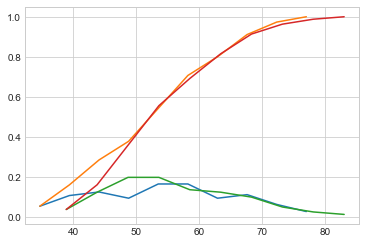

In [9]:
pos=gen.loc[gen["survivalstatus"]=="MoreThanOr5"]
neg=gen.loc[gen["survivalstatus"]=="LessThan5"]

counts, bin_edges = np.histogram(pos['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(neg["age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



1. We can say from above graph that if age is less than 38 years then he may have survived (probably).

# Conclusion
1. It is an imbalanced dataset.
2. We can say that if Number of positive axillary nodes detected is less than 10 and is detected at an early age, around 40, then he will survive for more than 5 years
3. We can say also that if the cancer gets detected an early age , then his chance of survival for more than 5 years is much more , no matter in which year he was operated.